##### converts to thresholded images and finds match using image differences

In [1]:
#imports

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import png

%matplotlib inline

In [2]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)
    
%pwd

'/home/ef2p/Kaggle/cardiac'

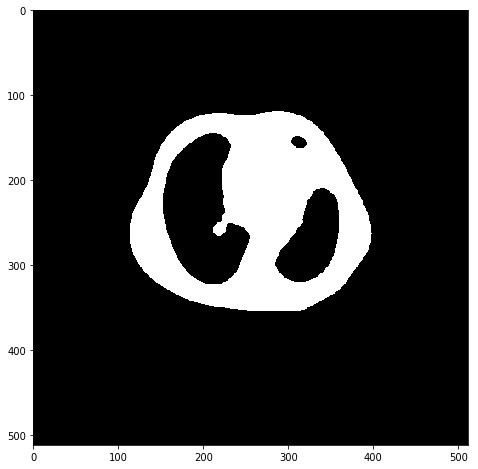

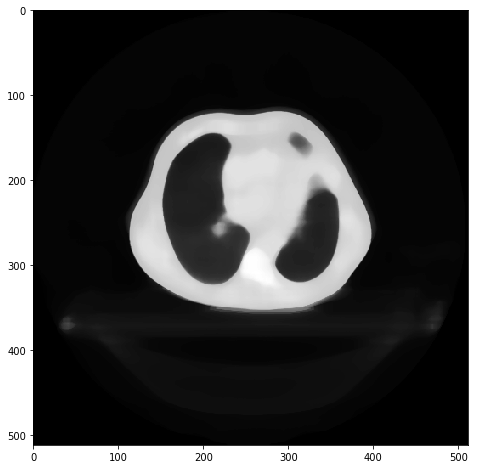

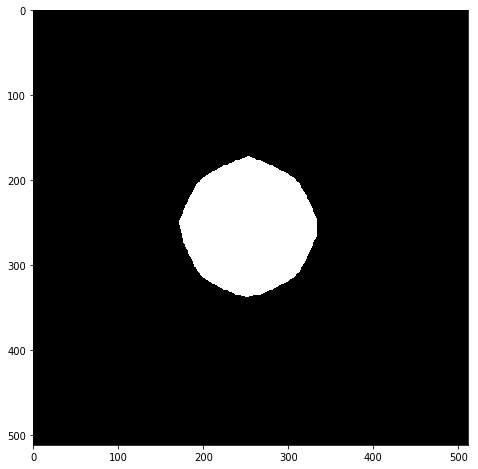

In [3]:
source_dir = r'Pre-png'

list_of_files = os.listdir(source_dir)

img_array = []
png = []
files = [0]

w = 100 # window width

ref = cv2.imread('Post-png/575.png',0)
#ref1 = ref[255-w:255+w,255-w:255+w] # select the central part of the image

# threshold the reference image in Post-Treatment
#ret, ref = cv2.threshold(ref,50,255,cv2.THRESH_BINARY)

ind =0

for file in list_of_files:
    f = os.path.join(source_dir,file)
    img_array.append(file)
    png.append(cv2.imread(f,0))
    files.append(file)
    
min = 1E32
    
for i in png:
    #print(np.max(i),np.max(ref))
    # seems post-Tx is displaced -20 pixel columns wrt pre-Tx 
    #i1 = i[255-w-12:255+w-12,255-w+18:255+w+18] # select the central part of the image
    #ret, i = cv2.threshold(i,100,255,cv2.THRESH_BINARY)
    diff = np.sum(cv2.subtract(i,ref))
    if diff < min:
        min = diff
        file_min = i
        file_ind = ind
    #print(diff)
    ind += 1

# apply blur    
ref = cv2.medianBlur(ref,25)
    
#  Apply Threshold (Binary with OTSU as well)   
ret, thresh = cv2.threshold(ref,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)    

display(thresh,cmap='gray')

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)  

display(opening,cmap='gray')  

# Finding sure foreground area
dist_transform = cv2.distanceTransform(ref,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)   
   
display(sure_fg,cmap='gray')  

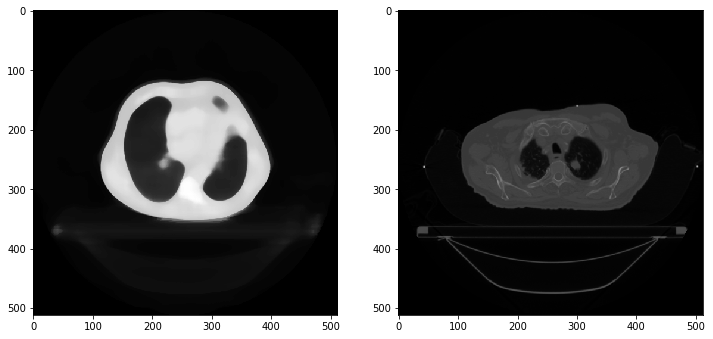

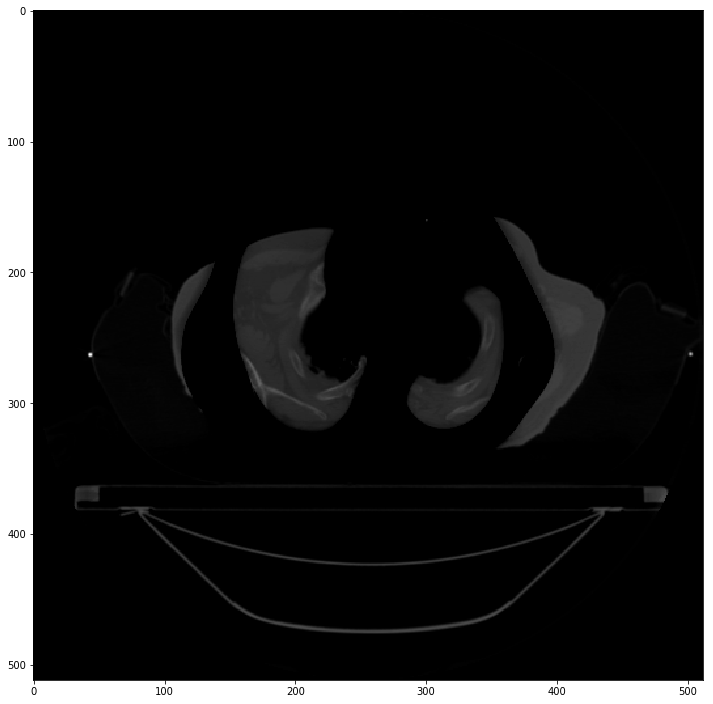

1058742
Corresponding Pre-Tx File:  603.png


In [4]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(ref, cmap='gray')
plt.subplot(122)
plt.imshow(file_min, cmap='gray')
plt.show()
plt.figure(figsize=(12,20))
plt.subplot(111)
# notice that numpy subtract causes the integer overflow!, use cv2 as it does saturation!
result = cv2.subtract(file_min,ref)
plt.imshow(result, cmap='gray')
plt.show()

print(np.sum(result))
print("Corresponding Pre-Tx File: ",files[file_ind])